# US Accident Analysis Project

### Hightlights of the project: 

1. Precise modeling & forecasting
2. Data visualization, traditional charts & Google Maps
3. Easy to follow for storytelling and presentations

## Agenda 
1. EDA
2. Data Clean and transformation
3. Model prediction for severity
4. Analysis


## Business problem
1. Find out the most important features influencing on Accident Severity
2. Find out the most risky location and make recommendation based on analysis
3. Find out the most risky location make recommendation based on analysis

## Data Introduction
US Accident dataset contains all accidents data in US from 2016 to 2020. It contains 423 million records and 49 columns. 

**Address Attributes (9):**

Number: Shows the street number in address field.

Street: Shows the street name in address field.

Side: Shows the relative side of the street (Right/Left) in address field.

City: Shows the city in address field.

...

**Weather Attributes (11):**

Airport_Code: Denotes an airport-based weather station which is the closest one to location of the accident.

Weather_Timestamp: Shows the time-stamp of weather observation record (in local time).

Temperature(F): Shows the temperature (in Fahrenheit).

Wind_Chill(F): Shows the wind chill (in Fahrenheit).

...

**Period-of-Day (4):**

Sunrise_Sunset: Shows the period of day (i.e. day or night) based on sunrise/sunset.

Civil_Twilight: Shows the period of day (i.e. day or night) based on civil twilight.

...

**Traffic Attributes(13):**

Amenity:indicates presence of amenity in a nearby location.

Bump: indicates presence of speed bump or hump in a nearby location.

Crossing: indicates presence of crossing in a nearby location.

...

**Others(2):**

ID: the unique idenfication number for every accident

Source: indicates where the infomation come from

Severity: indicates how long the influence of the accident last

## 1. EDA

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#connect to drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# import data
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/data_for_EDA.csv')

For the simplicity and readability of EDA, we use the data_for_EDA which does not convert all categorical variable to the dummy variable compared with cleaning dataset.

### Location

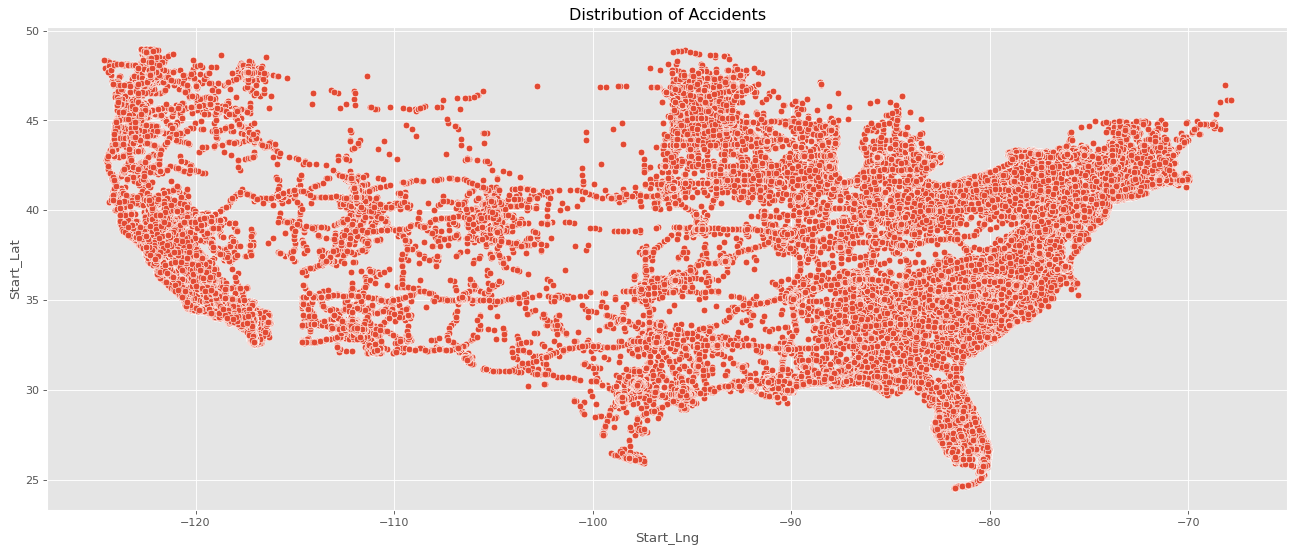

In [ ]:
plt.figure(figsize = (20,8),dpi = 80)
sns.scatterplot(x='Start_Lng',y = 'Start_Lat',data = df,palette='Accent')
plt.title('Distribution of Accidents')
plt.show()

### Others

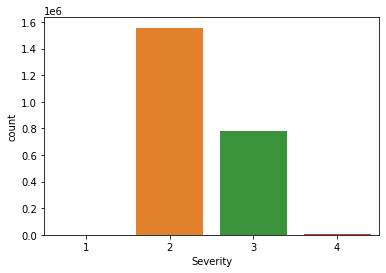

In [ ]:
# An overview towards the dataset
# Distribution of the target variable -- Severity
# Most severity of car accidents are 2
sns.countplot(x='Severity', data=df);

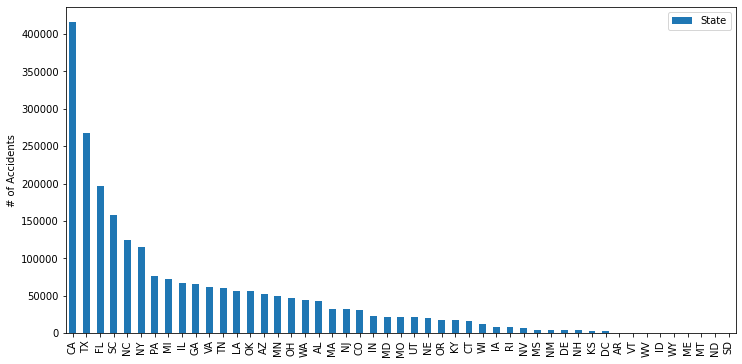

In [ ]:
# Countplot of state 
# California has the the most number of car accidents
df.State.value_counts().plot(kind='bar',figsize=(12, 6))
plt.ylabel('# of Accidents')
plt.legend(loc='best')

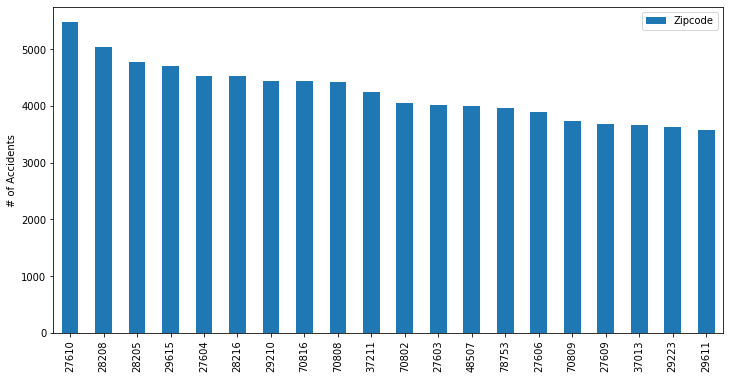

In [ ]:
# Countplot of top 20 zipcodes
zipcode = df.Zipcode.value_counts()
top_20_zipcode = zipcode.head(20)

top_20_zipcode.plot(kind='bar',figsize=(12, 6))
plt.ylabel('# of Accidents')
plt.legend(loc='best')

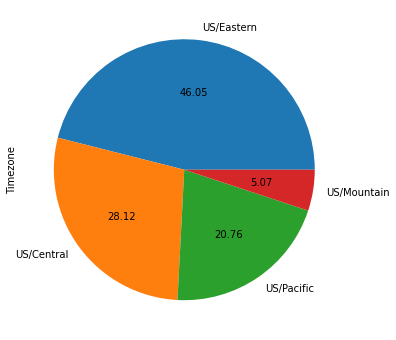

In [ ]:
# Pie Chart of Timezone
# Timezone US/Eastern occupies 46.05% car accidents
df['Timezone'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')

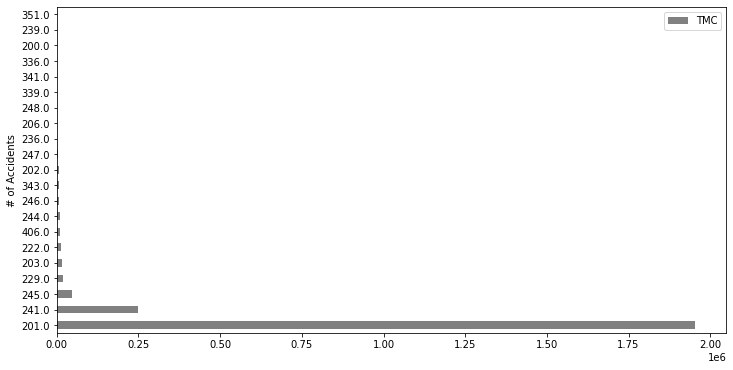

In [ ]:
# Countplot of TMC
df.TMC.value_counts().plot(kind='barh',figsize=(12, 6),color='Grey')
plt.ylabel('# of Accidents')
df.TMC.unique()
plt.legend(loc='best')

In [ ]:
# Analysis towards dummy variable
df.select_dtypes(['int64']).head()

,Severity,Side,Zipcode,Amenity,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Windy,Smoke,Sand,Sleet,Drizzle,Haze,Thunder,hour,Day,Month,Year
0,2,1,45176,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,8,2,2016
1,3,1,45417,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,8,2,2016
2,2,1,45459,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,8,2,2016
3,3,1,43081,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,8,2,2016
4,2,1,45417,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,8,2,2016


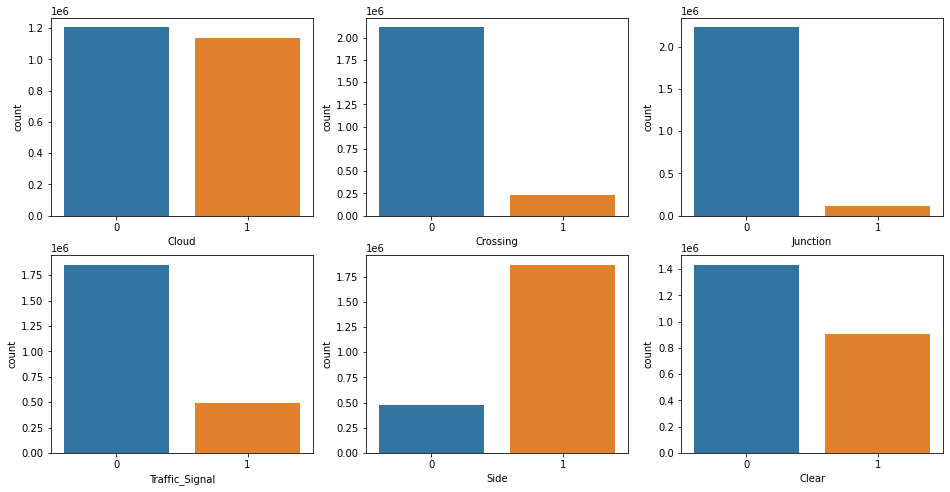

In [ ]:
# Distribution of some key dummy variables
# Most car accidents happen at right side and not clear days without traffic signal, crossing and junction
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

sns.countplot(x='Cloud', data=df, ax=axes[0,0]);
sns.countplot(x='Crossing', data=df, ax=axes[0,1]);
sns.countplot(x='Junction', data=df, ax=axes[0,2]);
sns.countplot(x='Traffic_Signal', data=df, ax=axes[1,0]);
sns.countplot(x='Side', data=df, ax=axes[1,1]);
sns.countplot(x='Clear', data=df, ax=axes[1,2]);

In [ ]:
# Analysis towards numeric variable
df.select_dtypes(['float64']).head()

,TMC,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),process_time
0,201.0,39.063148,-84.032608,0.01,36.0,100.0,29.67,10.0,3.5,30.0
1,201.0,39.747753,-84.205582,0.01,35.1,96.0,29.64,9.0,4.6,30.0
2,201.0,39.627781,-84.188354,0.01,36.0,89.0,29.65,6.0,3.5,30.0
3,201.0,40.100590,-82.925194,0.01,37.9,97.0,29.63,7.0,3.5,30.0
4,201.0,39.758274,-84.230507,0.00,34.0,100.0,29.66,7.0,3.5,30.0


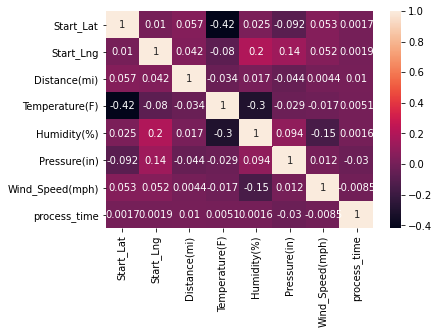

In [ ]:
# Correlation of the numerical variables
data = pd.DataFrame(df,columns=['Start_Lat','Start_Lng','Distance(mi)','Temperature(F)','Humidity(%)','Pressure(in)',
                'Wind_Speed(mph)','process_time'])

corrMatrix = data.corr()
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [ ]:
data1['Nautical_Twilight'] = data1['Nautical_Twilight'].replace({'Day':1,'Night':0})
data1['Civil_Twilight'] = data1['Civil_Twilight'].replace({'Day':1,'Night':0})
data1['Sunrise_Sunset'] = data1['Sunrise_Sunset'].replace({'Day':1,'Night':0})
data1['Astronomical_Twilight'] = data1['Astronomical_Twilight'].replace({'Day':1,'Night':0})

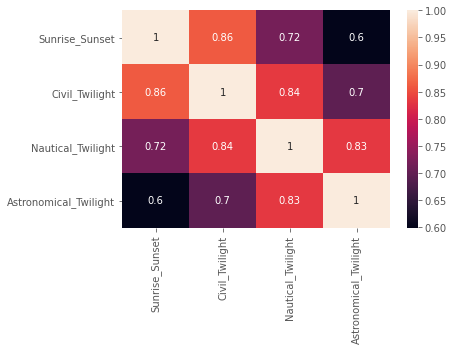

In [ ]:
sns.heatmap(data1[['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']].corr(),annot=True)

count    2.342907e+06
mean     6.303118e+01
std      1.866605e+01
min     -2.900000e+01
25%      5.100000e+01
50%      6.500000e+01
75%      7.700000e+01
max      1.890000e+02
Name: Temperature(F), dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


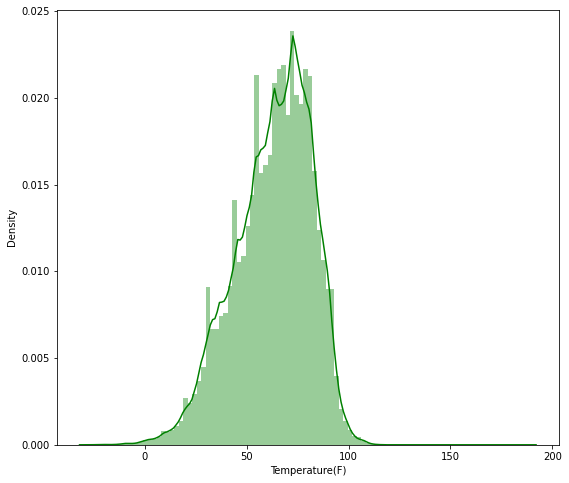

In [ ]:
# distplot of Temperature
# The distribution of temperature is slightly right-skewed
print(df['Temperature(F)'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Temperature(F)'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    2.342907e+06
mean     6.536868e+01
std      2.228193e+01
min      1.000000e+00
25%      4.900000e+01
50%      6.700000e+01
75%      8.400000e+01
max      1.000000e+02
Name: Humidity(%), dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


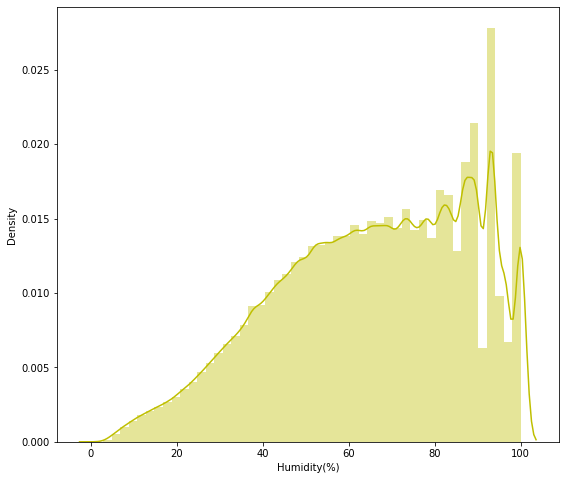

In [ ]:
# distplot of Humidity
# The distribution of Humidity is left-skewed
print(df['Humidity(%)'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Humidity(%)'], color='y', hist_kws={'alpha': 0.4});

count    2.342907e+06
mean     8.065425e+00
std      5.136269e+00
min      0.000000e+00
25%      4.600000e+00
50%      7.000000e+00
75%      1.040000e+01
max      8.228000e+02
Name: Wind_Speed(mph), dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


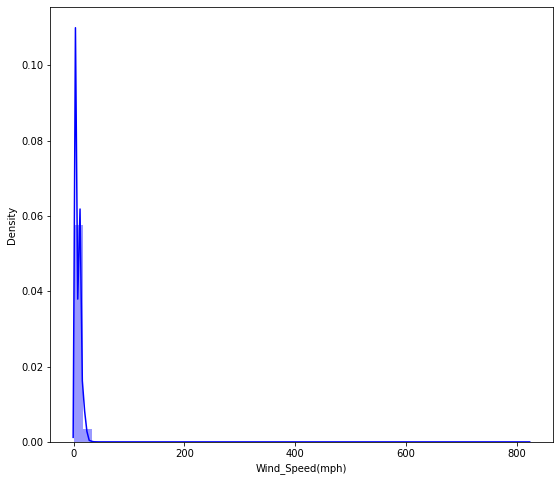

In [ ]:
# distplot of Wind_Speed
# The distribution of Wind_Speed is highly right-skewed
print(df['Wind_Speed(mph)'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Wind_Speed(mph)'], color='b', hist_kws={'alpha': 0.4});

count    2.342907e+06
mean     1.981369e-01
std      1.556905e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.417500e+02
Name: Distance(mi), dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


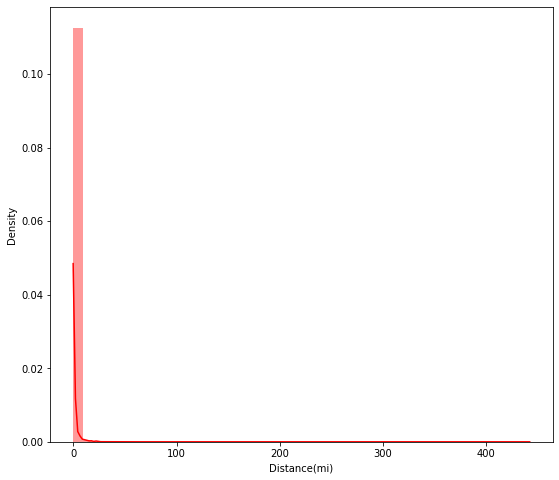

In [ ]:
# distplot of Distance
# The distribution of distance is highly right-skewed
print(df['Distance(mi)'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Distance(mi)'], color='r', hist_kws={'alpha': 0.4});

## 2. Data Clean and Transformation

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import math
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import data
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/US_Accidents_Dec20.csv')

In [ ]:
data.shape

(4232541, 49)

In [ ]:
# check missing data
((data.isna().sum()/len(data))*100).sort_values(ascending = False)

End_Lat                  64.180760
End_Lng                  64.180760
Number                   63.506745
Precipitation(in)        48.802575
Wind_Chill(F)            44.795809
TMC                      35.819240
Wind_Speed(mph)          11.324781
Visibility(mi)            2.331176
Weather_Condition         2.324443
Humidity(%)               2.255548
Temperature(F)            2.124020
Wind_Direction            1.975433
Pressure(in)              1.804684
Weather_Timestamp         1.480057
Airport_Code              0.212000
Timezone                  0.109036
Zipcode                   0.030525
Nautical_Twilight         0.003331
Astronomical_Twilight     0.003331
Civil_Twilight            0.003331
Sunrise_Sunset            0.003331
City                      0.003237
Description               0.000047
Amenity                   0.000000
Street                    0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time            

In [ ]:
# seperate data session to make the following operation easier
data1 = data

In [ ]:
# drop features that have too much missing data
data1 = data1.drop(columns=['End_Lat', 'End_Lng' ,'Precipitation(in)', 'Wind_Chill(F)', 'Number'])

In [ ]:
# we have tried to fill data with mean,median and mode and train the model.But the model performed bad
# Meanwhile, filling feature like temperature and humidity with mean or median made no sense, since different location have differnet weather
# It's unrealistic to fill the nan value in such a dataset. So we choose to drop these records.
# after dropping, there are still about 2 million records left. And we think it's enough for us to train the model.
data1 = data1.drop(columns = ['Description','Airport_Code'])
data1.dropna(subset=data1.columns[data1.isnull().mean()!=0], how='any', axis=0, inplace=True)

In [ ]:
# check missing data again
((data1.isna().sum()/len(data1))*100).sort_values(ascending = False)

Astronomical_Twilight    0.0
Side                     0.0
Temperature(F)           0.0
Weather_Timestamp        0.0
Timezone                 0.0
Country                  0.0
Zipcode                  0.0
State                    0.0
County                   0.0
City                     0.0
Street                   0.0
Nautical_Twilight        0.0
Distance(mi)             0.0
Start_Lng                0.0
Start_Lat                0.0
End_Time                 0.0
Start_Time               0.0
Severity                 0.0
TMC                      0.0
Source                   0.0
Humidity(%)              0.0
Pressure(in)             0.0
Visibility(mi)           0.0
Wind_Direction           0.0
Civil_Twilight           0.0
Sunrise_Sunset           0.0
Turning_Loop             0.0
Traffic_Signal           0.0
Traffic_Calming          0.0
Stop                     0.0
Station                  0.0
Roundabout               0.0
Railway                  0.0
No_Exit                  0.0
Junction      

In [ ]:
# dataset seperation
new_data = data1
new_data.index = new_data['ID']
new_data = new_data.drop(columns = ['ID','Street','Country','City','County'])

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2342907 entries, A-3 to A-2716599
Data columns (total 37 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 object 
 1   TMC                    float64
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   Distance(mi)           float64
 8   Side                   object 
 9   State                  object 
 10  Zipcode                object 
 11  Timezone               object 
 12  Weather_Timestamp      object 
 13  Temperature(F)         float64
 14  Humidity(%)            float64
 15  Pressure(in)           float64
 16  Visibility(mi)         float64
 17  Wind_Direction         object 
 18  Wind_Speed(mph)        float64
 19  Weather_Condition      object 
 20  Amenity                bool   
 21  Bump                   bool   
 22  Crossing           

In [ ]:
# categorical feature transformation
#1. boolean traffic features
# drop 100% True features
new_data = new_data.drop(columns = ['Bump','Give_Way','No_Exit','Roundabout','Traffic_Calming','Turning_Loop'])
# transfer other bollean features to 0 or 1
bl = ['Amenity','Crossing','Junction','Railway','Station','Stop','Traffic_Signal']
new_data[bl] = new_data[bl]*1
#2. no order categorical features
#side
new_data['Side'] =new_data['Side'].replace({'R':1,'L':0,' ':1})
#wind_direction
new_data.loc[new_data['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'

new_data.loc[(new_data['Wind_Direction']=='West')|(new_data['Wind_Direction']=='WSW')
             |(new_data['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'

new_data.loc[(new_data['Wind_Direction']=='South')|(new_data['Wind_Direction']=='SSW')
       |(new_data['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'

new_data.loc[(new_data['Wind_Direction']=='North')|(new_data['Wind_Direction']=='NNW')
       |(new_data['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'

new_data.loc[(new_data['Wind_Direction']=='East')|(new_data['Wind_Direction']=='ESE')
       |(new_data['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
new_data.loc[new_data['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
#weather_condition
new_data['Clear'] = np.where(new_data['Weather_Condition'].str.contains('Clear|Fair', case=False, na = False), 1, 0)
new_data['Cloud'] = np.where(new_data['Weather_Condition'].str.contains('Cloud|Overcast|Cloudy|Clouds', case=False, na = False), 1, 0)
new_data['Rain'] = np.where(new_data['Weather_Condition'].str.contains('Rain|storm', case=False, na = False),1, 0)
new_data['Heavy_Rain'] = np.where(new_data['Weather_Condition'].str.contains('Heavy Rain|Shower|Showers|T-Storm|Thunderstorms', case=False, na = False), 1,0)
new_data['Snow'] = np.where(new_data['Weather_Condition'].str.contains('Snow|Sleet|Ice|Wintry Mix', case=False, na = False),1, 0)
new_data['Heavy_Snow'] = np.where(new_data['Weather_Condition'].str.contains('Heavy Snow|Snow Showers', case=False, na = False), 1, 0)
new_data['Fog'] = np.where(new_data['Weather_Condition'].str.contains('Fog', case=False, na = False), 1, 0)
new_data['Windy'] = np.where(new_data['Weather_Condition'].str.contains('Windy', case=False, na = False),1, 0)
new_data['Smoke'] = np.where(new_data['Weather_Condition'].str.contains('Smoke', case=False, na = False),1, 0)
new_data['Sand'] = np.where(new_data['Weather_Condition'].str.contains('Dust|Sand|dust|Ash', case=False, na = False), 1, 0)
new_data['Sleet'] = np.where(new_data['Weather_Condition'].str.contains('Sleet|Ice Pellets|Squalls|Hail', case=False, na = False),1, 0)
new_data['Drizzle'] = np.where(new_data['Weather_Condition'].str.contains('Drizzle', case=False, na = False),1, 0)
new_data['Haze'] = np.where(new_data['Weather_Condition'].str.contains('Haze|Mist', case=False, na = False),1, 0)
new_data['Thunder'] = np.where(new_data['Weather_Condition'].str.contains('Thunder|Thunders|Thunderstorms|Thunderstorm', case=False, na = False),1, 0)
new_data = new_data.drop(columns = ['Weather_Condition','Wind_Direction'])

In [ ]:
# location feature transformation
new_data['Zipcode'] = new_data['Zipcode'].str[:5].astype(int)

In [ ]:
# time feature transformation
new_data['Start_Time'] = pd.to_datetime(new_data['Start_Time'])
new_data['End_Time'] = pd.to_datetime(new_data['End_Time'])
# drop weather_timestamp
new_data=new_data.drop(columns = ['Weather_Timestamp'])
# create processing time
new_data['process_time'] = ((new_data['End_Time']-new_data['Start_Time'])/np.timedelta64(1, "s"))/60 
new_data = new_data.drop(columns = ['End_Time'])
# Add hour,day month and year
temp=pd.DatetimeIndex(new_data['Start_Time'])
new_data['Start_date']=temp.date
new_data['Start_time']=temp.time
new_data['hour']=pd.to_datetime(new_data.Start_time,format="%H:%M:%S")
new_data['hour']=pd.Index(new_data["hour"]).hour
new_data = new_data.drop(columns = ['Start_time'])
new_data['Day']=pd.DatetimeIndex(new_data.Start_date).day
new_data['Month']=pd.DatetimeIndex(new_data.Start_date).month
new_data['Year']=pd.DatetimeIndex(new_data.Start_date).year
new_data = new_data.drop(columns = ['Start_date'])
# daylight
new_data['Nautical_Twilight'] = new_data['Nautical_Twilight'].replace({'Day':1,'Night':0})
new_data['Civil_Twilight'] = new_data['Civil_Twilight'].replace({'Day':1,'Night':0})
new_data['Sunrise_Sunset'] = new_data['Sunrise_Sunset'].replace({'Day':1,'Night':0})
new_data['Astronomical_Twilight'] = new_data['Astronomical_Twilight'].replace({'Day':1,'Night':0})

In [ ]:
# correlation
# the daylight columns are correlated, so delete the correlation features
new_data = new_data.drop(columns=['Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

Text(0, 0.5, 'Distance')

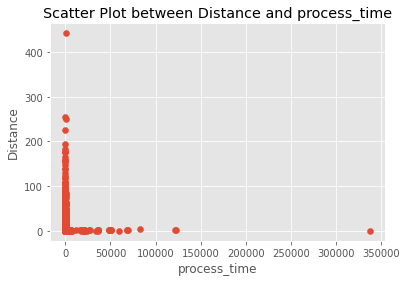

In [ ]:
# detect the outlier
plt.scatter(new_data['process_time'],new_data['Distance(mi)'])
plt.title('Scatter Plot between Distance and process_time')
plt.xlabel('process_time')
plt.ylabel('Distance')

In [ ]:
new_data[new_data['process_time']> 100000] #A-579624

,Source,TMC,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Side,State,Zipcode,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Windy,Smoke,Sand,Sleet,Drizzle,Haze,Thunder,process_time,hour,Day,Month,Year
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-391256,MapQuest,406.0,2,2016-11-08 01:00:00,32.763680,-97.318680,0.01,1,TX,76102,US/Central,66.0,93.0,30.16,3.0,3.5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,336960.000000,1,8,11,2016
A-1040353,MapQuest,406.0,3,2019-07-14 13:19:10,40.821640,-95.807564,1.75,1,IA,51654,US/Central,89.0,55.0,28.77,10.0,10.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,121960.833333,13,14,7,2019
A-1040354,MapQuest,406.0,3,2019-07-14 13:19:10,40.825241,-95.806221,1.75,1,IA,51654,US/Central,89.0,55.0,28.77,10.0,10.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,122029.833333,13,14,7,2019


In [ ]:
new_data = new_data.drop(index=['A-579624','A-391256','A-1040353','A-1040354'])

In [ ]:
# save one table data1 for EDA(before feature engineering)
new_data.to_csv(r'/content/drive/MyDrive/Colab Notebooks/data_for_EDA.csv')

In [ ]:
# no order categorial features-get dummuies
#(state are too much values, so get label code)
new = new_data
new['State']= new['State'].astype('category').cat.codes
categorical_features = new.select_dtypes(include = ["object"]).columns
numerical_features = new.select_dtypes(exclude = ["object"]).columns
num = new[numerical_features]
cat = new[categorical_features]
cat = pd.get_dummies(cat, drop_first=True)
new = pd.concat([num, cat], axis = 1)

In [ ]:
# save transformed new_data table for Supervised Model
new.to_csv(r'/content/drive/MyDrive/Colab Notebooks/data_for_mode.csv')

## 3. Model Prediction for Severity

**Assumption: applying models to data clusteredd by location might improve the prediction accuracy.**

We choose to apply model for all state then apply models in clusterd location and specific states to see if there is some improvement.

### (a). For all state data

In [ ]:
m_data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/data_for_mode.csv')

In [ ]:
m_data = m_data[m_data['Distance(mi)']<=50]

In [ ]:
m_data.index = m_data['ID']
m_data = m_data.drop('ID',axis = 1)
m_data.shape

(2342737, 45)

In [ ]:
m_data.head()

,TMC,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Side,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Windy,Smoke,Sand,Sleet,Drizzle,Haze,Thunder,process_time,hour,Day,Month,Year,Source_MapQuest-Bing,Timezone_US/Eastern,Timezone_US/Mountain,Timezone_US/Pacific
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-3,201.0,2,2016-02-08 06:49:27,39.063148,-84.032608,0.01,1,33,45176,36.0,100.0,29.67,10.0,3.5,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,6,8,2,2016,0,1,0,0
A-4,201.0,3,2016-02-08 07:23:34,39.747753,-84.205582,0.01,1,33,45417,35.1,96.0,29.64,9.0,4.6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,7,8,2,2016,0,1,0,0
A-5,201.0,2,2016-02-08 07:39:07,39.627781,-84.188354,0.01,1,33,45459,36.0,89.0,29.65,6.0,3.5,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,7,8,2,2016,0,1,0,0
A-6,201.0,3,2016-02-08 07:44:26,40.100590,-82.925194,0.01,1,33,43081,37.9,97.0,29.63,7.0,3.5,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,30.0,7,8,2,2016,0,1,0,0
A-7,201.0,2,2016-02-08 07:59:35,39.758274,-84.230507,0.00,1,33,45417,34.0,100.0,29.66,7.0,3.5,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,7,8,2,2016,0,1,0,0


In [ ]:
pd.DataFrame(m_data.columns)

,0
0,TMC
1,Severity
2,Start_Time
3,Start_Lat
4,Start_Lng
5,Distance(mi)
6,Side
7,State
8,Zipcode
9,Temperature(F)


Text(0, 0.5, 'Count')

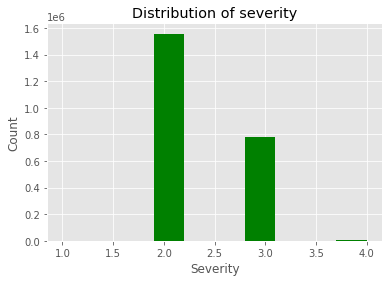

In [ ]:
plt.hist(m_data['Severity'],color='green')
plt.title('Distribution of severity')
plt.xlabel('Severity')
plt.ylabel('Count')

In [ ]:
m_data['Severity'].value_counts()

2    1556404
3     776836
4       8698
1        965
Name: Severity, dtype: int64

In [ ]:
sum(m_data[m_data['Severity']==1]['Distance(mi)']>200)

0

Text(0.5, 0, 'process_time mean')

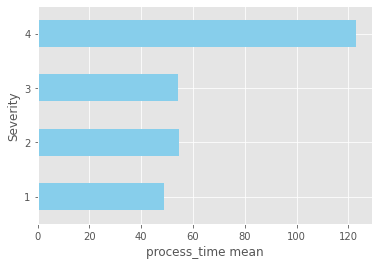

In [ ]:
p_m = m_data['process_time'].groupby(m_data['Severity']).mean()
from matplotlib.pyplot import cm
fig = plt.plot(figsize = (30,20))
p_m.plot.barh(color = 'skyblue');
plt.xlabel('process_time mean')

Text(0.5, 0, 'distance mean')

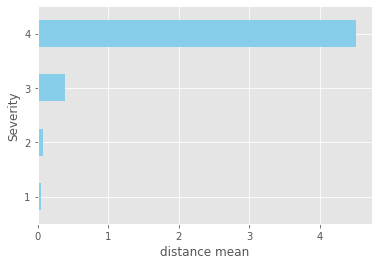

In [ ]:
d_m = m_data['Distance(mi)'].groupby(m_data['Severity']).mean()
from matplotlib.pyplot import cm
fig = plt.plot(figsize = (30,20))
d_m.plot.barh(color = 'skyblue')
plt.xlabel('distance mean')

In [ ]:
d_m = m_data['Distance(mi)'].groupby(m_data['Severity']).mean()

Severity
1    0.043192
2    0.076832
3    0.376898
4    4.403093
Name: Distance(mi), dtype: float64

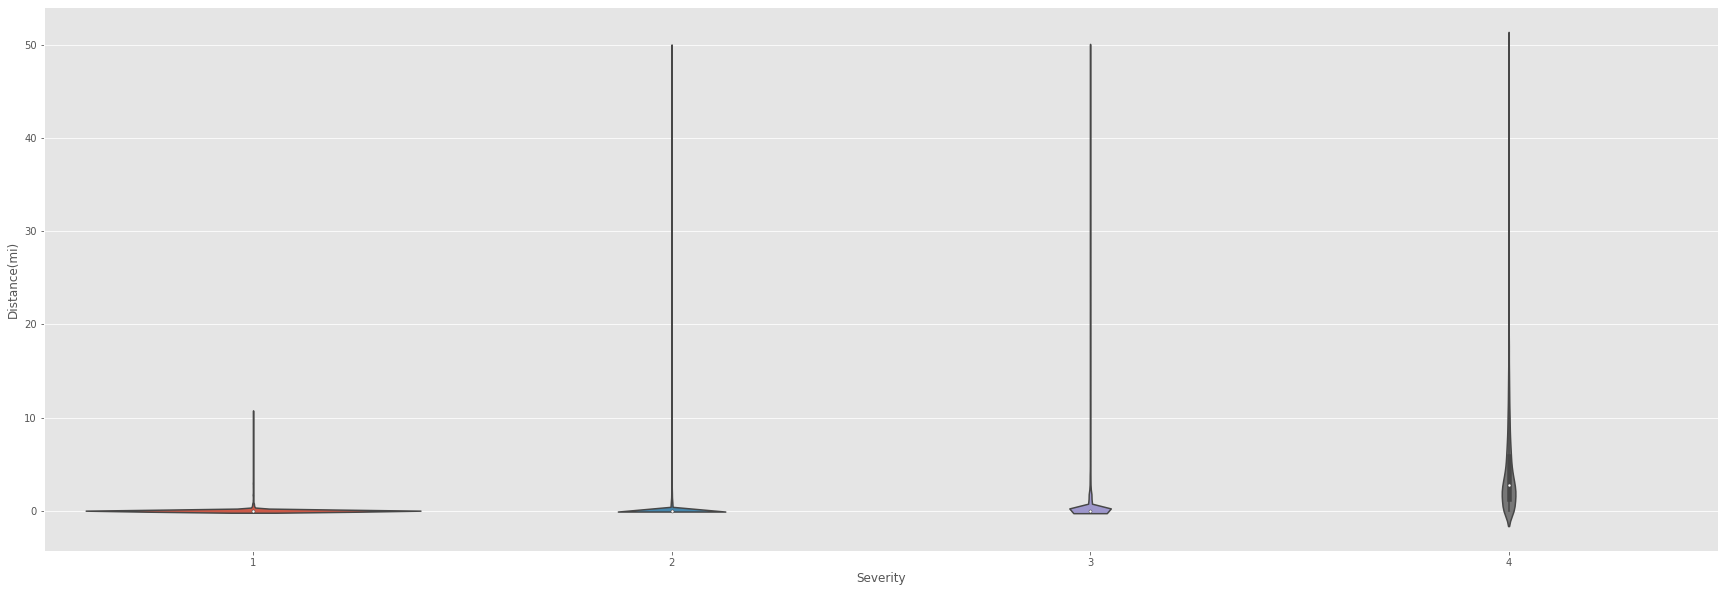

In [ ]:
fig,ax = plt.subplots(figsize = (30,10))
ax = sns.violinplot(x="Severity", y="Distance(mi)", data=m_data[m_data['Distance(mi)']<=50])

In [ ]:
# try DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN()
db.fit(X_train)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

Super imbalanced dependent features, which might influence the prediction.

In [ ]:
# oversample 4 and 1 and undersample 2 and 3
df = m_data.drop('Start_Time',axis = 1)
from sklearn.utils import resample
X = pd.concat([X_train, y_train], axis=1)
c1 = df[df.Severity==1]
c2 = df[df.Severity==2]
c3 = df[df.Severity==3]
c4 = df[df.Severity==4]
c1_upsampled = resample(c1,
                          replace=True, # sample with replacement
                          n_samples=600000, # match number in majority class
                          random_state=27)
c4_upsampled = resample(c4,
                          replace=True, # sample with replacement
                          n_samples=600000, # match number in majority class
                          random_state=27)
c2_downsampled = resample(c2,
                          replace=True, # sample with replacement
                          n_samples=600000, # match number in majority class
                          random_state=27)
c3_downsampled = resample(c3,
                          replace=True, # sample with replacement
                          n_samples=600000, # match number in majority class
                          random_state=27)
df = pd.concat([c1_upsampled, c2_downsampled,c3_downsampled
                ,c4_upsampled])

In [ ]:
# split data
df = m_data.drop('Start_Time',axis = 1)
target='Severity'
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [ ]:
#decision tree
dt = DecisionTreeClassifier(max_depth=14, random_state=0)
dt.fit(X_train, y_train)
pre = dt.predict(X_test)
acc = accuracy_score(y_test, pre)
print("Test set accuracy: {:.2f}".format(acc))


Test set accuracy: 0.80


In [ ]:
data_sever = df.sample(n=5000)
fig1 = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = data_sever['Start_Lng'],
        lat = data_sever['Start_Lat'],
        text = data_sever['City'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Reds',
            cmin = data_sever['Severity'].max(),
        color = data_sever['Severity'],
        cmax = 1,
            colorbar_title="Severity"
        )))

fig1.update_layout(
        title = 'Severity of accidents',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.7,
            subunitwidth = 0.7
        ),
    )

In [ ]:
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics
# Obtain the predictions from our random forest model 
pre = dt.predict(X_test)
# Predict probabilities
# Print the ROC curve, classification report and confusion matrix
#print(metrics.roc_auc_score(y_test, probs[:,1]))
print(metrics.classification_report(y_test, pre))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       193
           2       0.85      0.86      0.85    311271
           3       0.70      0.71      0.71    155347
           4       0.51      0.18      0.27      1737

    accuracy                           0.80    468548
   macro avg       0.52      0.44      0.46    468548
weighted avg       0.80      0.80      0.80    468548



In [ ]:
# cost_function (too memory-cost)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight='balanced')
# define cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

In [ ]:
# Random Forest algorithm
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
# View The Accuracy Of Our Limited Feature Model
print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

[Randon forest algorithm -- Limited feature] accuracy_score: 0.866.


In [ ]:
y_test.value_counts()

2    311271
3    155347
4      1737
1       193
Name: Severity, dtype: int64

In [ ]:
pd.DataFrame(y_pred).value_counts()

2    317621
3    150570
4       354
1         3
dtype: int64

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       193
           2       0.89      0.91      0.90    311271
           3       0.81      0.78      0.80    155347
           4       0.72      0.15      0.24      1737

    accuracy                           0.87    468548
   macro avg       0.60      0.46      0.49    468548
weighted avg       0.86      0.87      0.86    468548



In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Start_Lat               0.114305
Start_Lng               0.113597
Zipcode                 0.104512
Side                    0.069215
process_time            0.068718
Traffic_Signal          0.051454
Pressure(in)            0.050286
Temperature(F)          0.045318
Humidity(%)             0.043496
hour                    0.042559
TMC                     0.039526
Day                     0.039302
Wind_Speed(mph)         0.034581
Month                   0.028515
State                   0.028110
Distance(mi)            0.025261
Year                    0.020903
Crossing                0.017890
Visibility(mi)          0.012355
Junction                0.008460
Sunrise_Sunset          0.005855
Cloud                   0.005432
Clear                   0.005296
Stop                    0.004418
Timezone_US/Eastern     0.003027
Rain                    0.002756
Timezone_US/Pacific     0.002447
Station                 0.002184
Source_MapQuest-Bing    0.002027
Amenity                 0.001372
Timezone_U

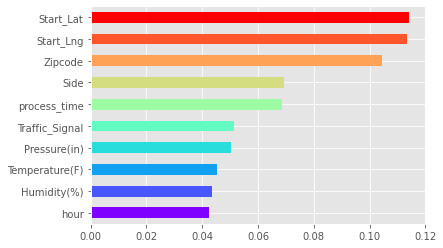

In [ ]:

from matplotlib.pyplot import cm
fig = plt.plot(figsize = (30,20))
bar = feature_imp.sort_values().tail(10)
bar.plot.barh(color = iter(cm.rainbow(np.linspace(0,1,10))));

In [ ]:
important = ['Start_Lat','Start_Lng','Zipcode','Side','process_time','Traffic_Signal','Pressure(in)','Temperature(F)','Humidity(%)','hour']
X_important_train = X_train[important]
X_important_test = X_test[important]

In [ ]:


# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature Model
print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_important_pred)))

[Randon forest algorithm -- Limited feature] accuracy_score: 0.883.


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       193
           2       0.89      0.91      0.90    311271
           3       0.81      0.78      0.80    155347
           4       0.72      0.15      0.24      1737

    accuracy                           0.87    468548
   macro avg       0.60      0.46      0.49    468548
weighted avg       0.86      0.87      0.86    468548



In [ ]:
# SMOTE
train = pd.concat([X_important_train,y_train],axis = 1)
test = pd.concat([X_important_test,y_test],axis = 1)
dt = pd.concat([train,test])
y = dt['Severity']
X = dt.drop('Severity',axis = 1)

In [ ]:
# SMOTE
train = pd.concat([X_important_train,y_train],axis = 1)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
X.shape

(6225416, 10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [ ]:
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = clf_important.predict(X_test)
print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

[Randon forest algorithm -- Limited feature] accuracy_score: 0.945.


In [ ]:
print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    311271
           2       0.92      0.87      0.89    311271
           3       0.88      0.91      0.89    311271
           4       0.98      1.00      0.99    311271

    accuracy                           0.95   1245084
   macro avg       0.95      0.95      0.94   1245084
weighted avg       0.95      0.95      0.94   1245084



In [ ]:
plt.figure(figsize = (20,8),dpi = 80)
sns.scatterplot(x='Start_Lng',y = 'Start_Lat',data = m_data,hue='Severity',palette='hls')
plt.title('Distribution of Severity Over map')
plt.show()

In [ ]:
m_data[m_data['Start_Lat']<10]

,ID,TMC,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Side,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Windy,Smoke,Sand,Sleet,Drizzle,Haze,Thunder,process_time,hour,Day,Month,Year,Source_MapQuest-Bing,Timezone_US/Eastern,Timezone_US/Mountain,Timezone_US/Pacific
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2,2.0,2,2,2.0,2.0,2.0,2,2,2,2.0,2.0,2.0,2.0,2.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2,2,2,2,2,2,2,2
2,2,2.0,2,2,2.0,2.0,2.0,2,2,2,2.0,2.0,2.0,2.0,2.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2,2,2,2,2,2,2,2
2,2,2.0,2,2,2.0,2.0,2.0,2,2,2,2.0,2.0,2.0,2.0,2.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2,2,2,2,2,2,2,2
2,2,2.0,2,2,2.0,2.0,2.0,2,2,2,2.0,2.0,2.0,2.0,2.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2,2,2,2,2,2,2,2
2,2,2.0,2,2,2.0,2.0,2.0,2,2,2,2.0,2.0,2.0,2.0,2.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2,2.0,2,2,2.0,2.0,2.0,2,2,2,2.0,2.0,2.0,2.0,2.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2,2,2,2,2,2,2,2
2,2,2.0,2,2,2.0,2.0,2.0,2,2,2,2.0,2.0,2.0,2.0,2.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2,2,2,2,2,2,2,2
2,2,2.0,2,2,2.0,2.0,2.0,2,2,2,2.0,2.0,2.0,2.0,2.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2,2,2,2,2,2,2,2


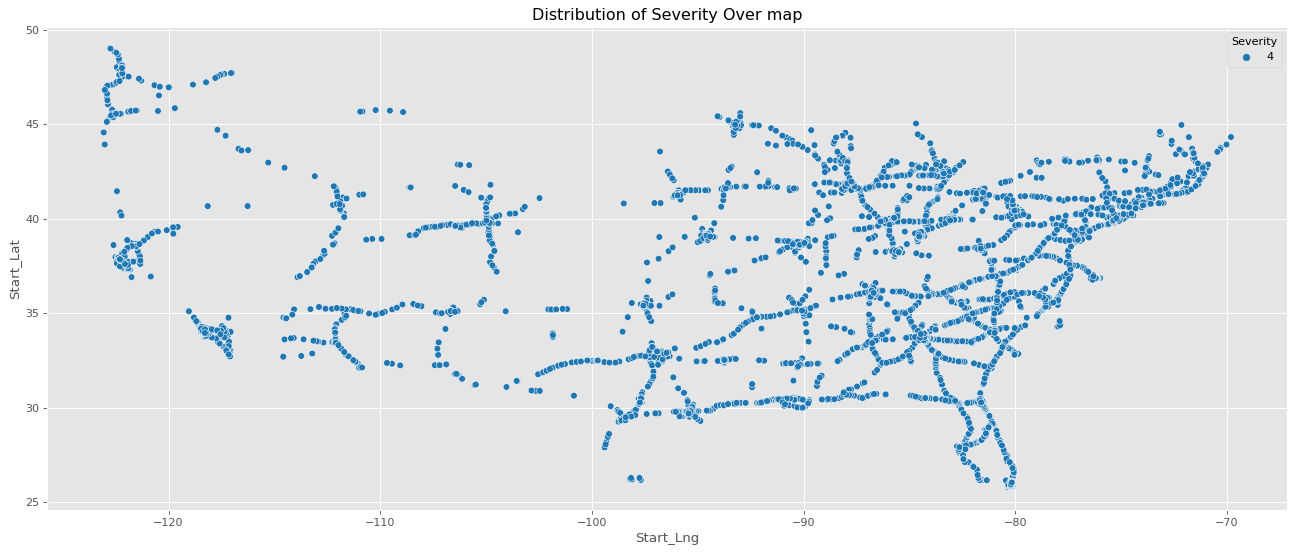

In [ ]:
plt.figure(figsize = (20,8),dpi = 80)
sns.scatterplot(x='Start_Lng',y = 'Start_Lat',data = m_data[m_data['Severity']==4],hue='Severity',palette='tab10')
plt.title('Distribution of Severity 4 Over map')
plt.show()

In [ ]:
m_data['Distance(mi)'].groupby(m_data['Severity']).mean()

Severity
2    0.078024
3    0.376898
4    4.403093
Name: Distance(mi), dtype: float64

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
i_data = m_data
i_data[i_data['Severity']==1]=2

In [ ]:
i_data.index = i_data['ID']
i_data = i_data.drop('ID',axis = 1)

In [ ]:
t = m_data['Severity']
i_data = i_data.drop(columns = ['Start_Time'])
clf=IsolationForest(n_estimators=100)
clf.fit(i_data)
pred = clf.predict(i_data)

In [ ]:
pd.DataFrame(pred).value_counts()

 1    2187834
-1     154903
dtype: int64

In [ ]:
clf.decision_function(i_data.drop(columns = ['i_pred']))

array([0.06251034, 0.07638869, 0.07309309, ..., 0.00029554, 0.06469406,
       0.07160612])

In [ ]:
f_data = i_data
f_data[f_data['Severity']==2]=1
f_data[f_data['Severity']==3]=1
accuracy_score(f_data['Severity'], f_data['i_pred'])


0.9311062231910795

In [ ]:
f_data['Severity'].value_counts()

1    2334054
4       8683
Name: Severity, dtype: int64

In [ ]:
f_data['i_pred'].value_counts()

 1    2187834
-1     154903
Name: i_pred, dtype: int64

In [ ]:
i_data['i_pred']=pred

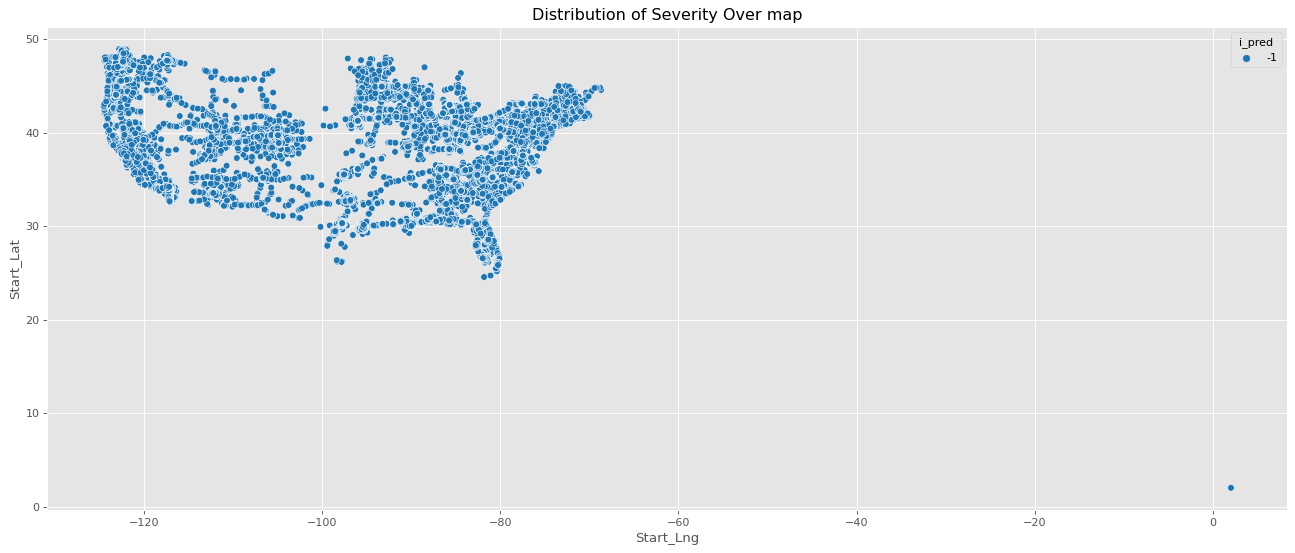

In [ ]:
plt.figure(figsize = (20,8),dpi = 80)
sns.scatterplot(x='Start_Lng',y = 'Start_Lat',data = i_data[i_data['i_pred'] ==-1],hue='i_pred',palette='tab10')
plt.title('Distribution of Severity Over map')
plt.show()

In [ ]:
ca['Severity'].value_counts()

2    246201
3    168641
4       493
1       203
Name: Severity, dtype: int64

### (b). For specific cluster

In [ ]:
#kmeans cluster
from sklearn.cluster import MiniBatchKMeans
def find_clusters(increment):
    kmeans = MiniBatchKMeans(n_clusters=increment, batch_size=10000,random_state=42).fit(m_data[['Start_Lat','Start_Lng']].values)
    df['Cluster'] = kmeans.predict(m_data[['Start_Lat','Start_Lng']])
    cluster_centers = kmeans.cluster_centers_
    cluster_len = len(cluster_centers)
    return cluster_centers, cluster_len
# clustering
cluster_centers, cluster_len = find_clusters(5)

In [ ]:
m = folium.Map(cluster_centers[0])
for x in cluster_centers:
  folium.Marker(x).add_to(m)

In [ ]:
m

In [ ]:
m_data['position'] = m_data['Start_Lat'].astype(str).str.cat(m_data['Start_Lng'].astype(str),sep = ',')
pf_t = dict(m_data['position'].value_counts())
most_risk_point = [i[0]for i in pf_t.items() if i[1]>300]

In [ ]:
m = folium.Map(location =[37.808498, -122.366852], zoom_start=8)
for x in most_risk_point:
  x = list(map(float,(x).split(',')))
  folium.Marker(x,popup="Risky-Point",icon=folium.Icon(color = 'green')).add_to(m)

In [ ]:
severity_points = m_data[m_data['Severity']==4]['position']
rp = dict(severity_points.value_counts())
s_point = [i[0]for i in rp.items() if i[1]>=10]

In [ ]:
for x in s_point:
  x = list(map(float,(x).split(',')))
  folium.Marker(x,popup="death",icon=folium.Icon(color = 'Red')).add_to(m)

In [ ]:
m